In [1]:
import os

# go to root directory if needed
print(f"Current working directory: {os.getcwd()}")
if os.getcwd().split("/")[-1] == "notebooks":
    os.chdir("..")
    print(f"Changed working directory to: {os.getcwd()}")

Current working directory: /Users/patrickschuermann/Documents/GitHub/FlareSense/notebooks
Changed working directory to: /Users/patrickschuermann/Documents/GitHub/FlareSense


In [40]:
import torch
import src.utils.data as data

from torchvision import transforms

import matplotlib.pyplot as plt

# Settings
torch.manual_seed(0)

Loading data

In [33]:
# Als DataModule (Trainings-, Validierungs- und Testdaten unterteilt)
data_folder_path = "data/raw/burst_images/"

data_module = data.ECallistoDataModule(
    data_folder=data_folder_path,
    transform=transforms.Compose(
        [
            transforms.ToPILImage(),
            transforms.Resize((193, 240), antialias=True),
            transforms.ToTensor(),
        ]
    ),
    batch_size=32,
    num_workers=0,
    val_ratio=0.15,
    test_ratio=0.15,
)
data_module.setup()

### Überprüfung der Instrumente

In [34]:
def count_instruments(instruments):
    instrument_count = {}
    for instrument in instruments:
        if instrument in instrument_count:
            instrument_count[instrument] += 1
        else:
            instrument_count[instrument] = 1

    return instrument_count

for dataset_type in ["train", "val", "test"]:
    instruments = data_module.get_dataset_instruments(dataset_type)
    instrument_count = count_instruments(instruments)

    print(f"\n{dataset_type.capitalize()} Daten:")
    for instrument, count in instrument_count.items():
        print(f"Instrument: {instrument}, Anzahl: {count}")

    total_instruments = sum(instrument_count.values())
    print("Total Instrumente in {}: {}".format(dataset_type, total_instruments))




Train Daten:
Instrument: australia_assa, Anzahl: 24487
Instrument: swiss_landschlacht, Anzahl: 6750
Instrument: alaska_haarp, Anzahl: 12142
Instrument: humain, Anzahl: 11177
Instrument: india_ooty, Anzahl: 1594
Instrument: glasgow, Anzahl: 4381
Total Instrumente in train: 60531

Val Daten:
Instrument: australia_assa, Anzahl: 5215
Instrument: alaska_haarp, Anzahl: 2688
Instrument: humain, Anzahl: 2356
Instrument: swiss_landschlacht, Anzahl: 1426
Instrument: glasgow, Anzahl: 947
Instrument: india_ooty, Anzahl: 335
Total Instrumente in val: 12967

Test Daten:
Instrument: swiss_landschlacht, Anzahl: 1374
Instrument: glasgow, Anzahl: 913
Instrument: australia_assa, Anzahl: 5316
Instrument: humain, Anzahl: 2447
Instrument: alaska_haarp, Anzahl: 2568
Instrument: india_ooty, Anzahl: 349
Total Instrumente in test: 12967


In [44]:
def count_samples_per_class(dataloader):
    class_count = {}
    for _, _, label, _ in dataloader.dataset:
        if label not in class_count:
            class_count[label] = 0
        class_count[label] += 1
    return dict(sorted(class_count.items()))

for dataset_type in ["train", "val", "test"]:
    dataloader = None
    if dataset_type == "train":
        dataloader = data_module.train_dataloader()
    elif dataset_type == "val":
        dataloader = data_module.val_dataloader()
    elif dataset_type == "test":
        dataloader = data_module.test_dataloader()

    class_count = count_samples_per_class(dataloader)

    print(f"\nDistribution of classes in {dataset_type.capitalize()} data:")
    for class_label, count in class_count.items():
        print(f"Class: {class_label}, Count: {count}")

    total_samples = sum(class_count.values())
    print(f"Total samples in {dataset_type}: {total_samples}")



Distribution of classes in Train data:
Class: 2, Count: 66
Class: 3, Count: 238
Class: 4, Count: 11
Class: 5, Count: 4
Class: 6, Count: 514
Class: no_burst, Count: 59698
Total samples in train: 60531

Distribution of classes in Val data:
Class: 2, Count: 14
Class: 3, Count: 50
Class: 4, Count: 2
Class: 6, Count: 109
Class: no_burst, Count: 12792
Total samples in val: 12967

Distribution of classes in Test data:
Class: 2, Count: 14
Class: 3, Count: 50
Class: 4, Count: 2
Class: 6, Count: 109
Class: no_burst, Count: 12792
Total samples in test: 12967


### Überprüfung der Batches

In [35]:
train_loader = data_module.train_dataloader()
image, filename, label, instrument = next(iter(train_loader))

In [39]:
image

tensor([[[0.3765, 0.3490, 0.3765,  ..., 0.3765, 0.3490, 0.3490],
         [0.5412, 0.5412, 0.5412,  ..., 0.5137, 0.5412, 0.4863],
         [0.3255, 0.3490, 0.3490,  ..., 0.3490, 0.3255, 0.3255],
         ...,
         [0.0510, 0.0510, 0.0510,  ..., 0.0784, 0.0510, 0.0784],
         [0.0510, 0.0510, 0.0510,  ..., 0.0510, 0.0235, 0.0510],
         [0.0235, 0.0510, 0.0784,  ..., 0.0510, 0.0510, 0.0510]],

        [[0.4549, 0.4549, 0.4549,  ..., 0.4549, 0.4549, 0.4549],
         [0.4863, 0.4863, 0.4863,  ..., 0.4549, 0.4863, 0.5137],
         [0.4235, 0.4235, 0.4549,  ..., 0.3333, 0.3333, 0.3647],
         ...,
         [0.3647, 0.3647, 0.3922,  ..., 0.3647, 0.3647, 0.3922],
         [0.3647, 0.3647, 0.3922,  ..., 0.3647, 0.3647, 0.3922],
         [0.3922, 0.3647, 0.3333,  ..., 0.3647, 0.3647, 0.3922]],

        [[0.2510, 0.2627, 0.2510,  ..., 0.2510, 0.2510, 0.2510],
         [0.2980, 0.3098, 0.2863,  ..., 0.2863, 0.2745, 0.2863],
         [0.3569, 0.3922, 0.3569,  ..., 0.3686, 0.3686, 0.

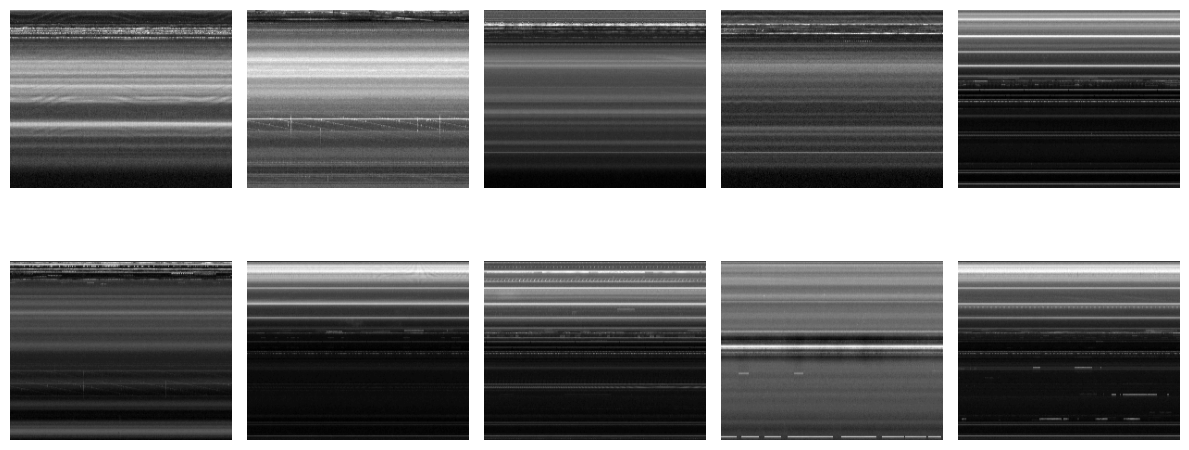

In [43]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

# Extrahieren der ersten 10 Bilder aus der Variable images
first_10_images = image[:10]

# Zeigen Sie die Bilder an
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    # Wandeln Sie den Tensor in ein PIL-Bild um
    pil_image = to_pil_image(first_10_images[i])
    
    # Zeigen Sie das PIL-Bild an
    ax.imshow(pil_image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Old, maybe useful once again

In [4]:
batch_data, batch_filenames, batch_labels = next(iter(data_module.train_dataloader()))

first_data_in_batch = batch_data[0]
first_timestamp_in_batch = batch_filenames[0]
first_folder_number_in_batch = batch_labels[0]

print("First data in batch:", first_data_in_batch)
print("Timestamp of first data:", first_timestamp_in_batch)
print("Folder number of data:", first_folder_number_in_batch)

First data in batch: tensor([[ 52,  52,  52,  ...,  56,  56,  56],
        [129, 129, 126,  ..., 175, 179, 194],
        [183, 179, 149,  ..., 225, 229, 221],
        ...,
        [ 30,  30,  34,  ...,  26,  30,  34],
        [ 22,  19,  19,  ...,  19,  19,  22],
        [ 15,  11,  11,  ...,  11,   7,  11]], dtype=torch.uint8)
Timestamp of first data: 2021-04-14 00-59-00_2021-04-14 01-00-00_australia_assa_02_None_no_burst.png
Folder number of data: no_burst


Get samples per class for each dataloader

In [5]:
def count_samples_per_class(dataloader):
    count = {}
    for _, _, label in dataloader.dataset:
        if label not in count:
            count[label] = 0
        count[label] += 1
    return dict(sorted(count.items()))


print(
    f"Distribution of classes in training set: {count_samples_per_class(data_module.train_dataloader())}"
)

print(
    f"Distribution of classes in validation set: {count_samples_per_class(data_module.val_dataloader())}"
)

print(
    f"Distribution of classes in test set: {count_samples_per_class(data_module.test_dataloader())}"
)

Distribution of classes in training set: {'2': 58, '3': 204, '4': 9, '5': 4, '6': 440, 'no_burst': 51170}
Distribution of classes in validation set: {'2': 18, '3': 67, '4': 3, '6': 146, 'no_burst': 17056}
Distribution of classes in test set: {'2': 18, '3': 67, '4': 3, '6': 146, 'no_burst': 17056}


and check with number of rows in the dataset

In [6]:
print(f"Train Dataset Length: {len(data_module.train_dataset)}")
print(f"Val Dataset Length: {len(data_module.val_dataset)}")
print(f"Test Dataset Length: {len(data_module.test_dataset)}")

Train Dataset Length: 51885
Val Dataset Length: 17290
Test Dataset Length: 17290
